### Project task 1:
#### Data import and preparation:

In [147]:
## importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
## importing data

train= pd.read_csv('train.csv')
test= pd.read_csv('test.csv')

In [54]:
df= pd.concat([test,train])

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39030 entries, 0 to 27320
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          39030 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     39030 non-null  int64  
 3   COUNTYID                     39030 non-null  int64  
 4   STATEID                      39030 non-null  int64  
 5   state                        39030 non-null  object 
 6   state_ab                     39030 non-null  object 
 7   city                         39030 non-null  object 
 8   place                        39030 non-null  object 
 9   type                         39030 non-null  object 
 10  primary                      39030 non-null  object 
 11  zip_code                     39030 non-null  int64  
 12  area_code                    39030 non-null  int64  
 13  lat             

In [56]:
df.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,255504,NaN,140,163,26,Michigan,MI,Detroit,Dearborn Heights City,CDP,...,34.78682,33.75000,21.58531,416.48097,1938.0,0.70252,0.28217,0.05910,0.03813,0.14299
1,252676,NaN,140,1,23,Maine,ME,Auburn,Auburn City,City,...,44.23451,46.66667,22.37036,532.03505,1950.0,0.85128,0.64221,0.02338,0.00000,0.13377
2,276314,NaN,140,15,42,Pennsylvania,PA,Pine City,Millerton,Borough,...,41.62426,44.50000,22.86213,453.11959,1879.0,0.81897,0.59961,0.01746,0.01358,0.10026
3,248614,NaN,140,231,21,Kentucky,KY,Monticello,Monticello City,City,...,44.81200,48.00000,21.03155,263.94320,1081.0,0.84609,0.56953,0.05492,0.04694,0.12489
4,286865,NaN,140,355,48,Texas,TX,Corpus Christi,Edroy,Town,...,40.66618,42.66667,21.30900,709.90829,2956.0,0.79077,0.57620,0.01726,0.00588,0.16379


In [57]:
## removing null column

df.drop('BLOCKID', axis=1,inplace=True)

In [151]:
## checking for null values

print(df.isnull().sum())
df.dropna(inplace=True)

UID           0
SUMLEVEL      0
COUNTYID      0
STATEID       0
state         0
             ..
separated     0
divorced      0
bad_debt      0
median_age    0
density       0
Length: 82, dtype: int64


In [9]:
## filling null values with mean of their respective column

for i in df.columns:
  if df[i].isnull().sum()!=0:
    df.fillna(df[i].mean(), inplace=True)

In [60]:
## checking for null values

df.isna().sum()

UID            0
SUMLEVEL       0
COUNTYID       0
STATEID        0
state          0
              ..
pct_own        0
married        0
married_snp    0
separated      0
divorced       0
Length: 79, dtype: int64

#### 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10 percent.

In [61]:
top=df.nlargest(2500,'second_mortgage')

In [62]:
top= top.loc[:,['state','city','zip_code','area_code','lat','lng','second_mortgage']]
top.head()

,state,city,zip_code,area_code,lat,lng,second_mortgage
14014,New Jersey,Passaic,7055,973,40.867944,-74.114633,0.60870
6238,New York,Bronx,10452,718,40.842166,-73.926952,0.58824
3285,Virginia,Farmville,23901,434,37.297357,-78.396452,0.50000
21706,Arizona,Scottsdale,85257,480,33.458658,-111.955104,0.43750
11980,Massachusetts,Worcester,1610,508,42.254262,-71.800347,0.43363


In [63]:
import plotly.express as px

#### Scatter geo plot for top 2500 locations with highest second mortgage

In [64]:
px.scatter_geo(top, lat='lat',lon='lng',color= 'second_mortgage',hover_name= 'state',projection='mollweide' )

The geoplot shows scatterd dots for top 2500 locations in given dataset having highest second mortgage

#### Bad debt calculations

In [65]:
bad_debt= (df.second_mortgage - + df.home_equity) - df.home_equity_second_mortgage

In [66]:
bad_debt

0       -0.07651
1       -0.14375
2       -0.06250
3       -0.01741
4       -0.03440
          ...   
27316    0.00000
27317   -0.18374
27318   -0.07857
27319   -0.10807
27320   -0.18362
Length: 37940, dtype: float64

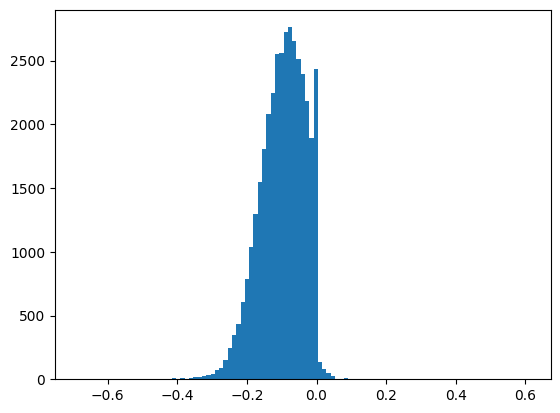

In [67]:
plt.hist(bad_debt,bins=105)
plt.show()

In [68]:
## adding bad debt column to our original dataset

df['bad_debt']= bad_debt

In [69]:
df.bad_debt.median()

-0.09091

#### Box and whisker plot and for 2nd mortgage, home equity, good debt, and bad debt for different cities.

The yellow line in the interquartile range is the median <br>
The green triangle in the interquartile range is the mean <br>
The '+' sign shows the presence of outliers in dataset

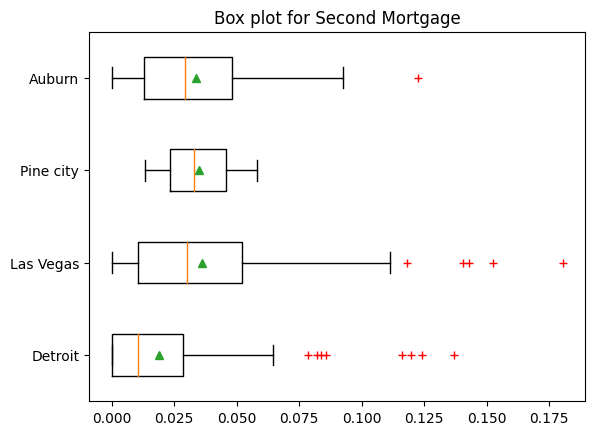

In [70]:
det= df.loc[df['city']== 'Detroit','second_mortgage'].values
las= df.loc[df['city']== 'Las Vegas','second_mortgage'].values
pine= df.loc[df['city']== 'Pine City','second_mortgage'].values
aub= df.loc[df['city']== 'Auburn','second_mortgage'].values
plt.boxplot([det,las,pine,aub],labels=['Detroit','Las Vegas','Pine city','Auburn'],showmeans=True, sym= 'r+',vert=False);
plt.title('Box plot for Second Mortgage')
plt.show()

*  From the above box plot we can observe the median value of the **second mortgage** data is much closer to the first quartile than the third quartile, which means the **distribution of Auburn, Pine city, Las Vegas and Detroit is right-skewed**. <br>
*  The data contains **outliers above upper quartile range** in the second mortgage data in **Pine city, Las Vegas and Detroit**, which means some people living in Auburn, Detroit and Las Vegas have much more second mortgage.
*  There are many outliers in above qurtile range in Detroit and Las Vegas as compared to Auburn, which means some people living in Detroit and Las Vegas have much more second mortgage as compared to other cities

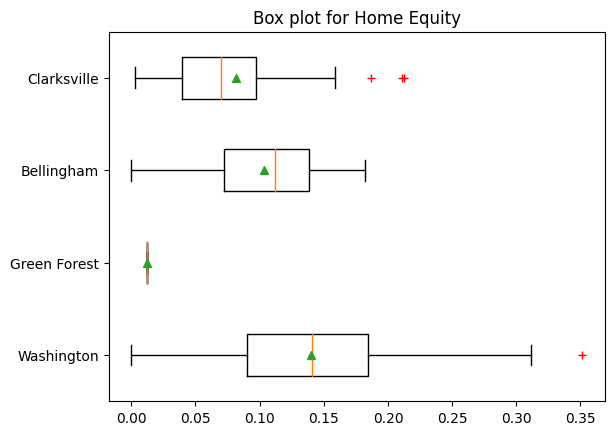

In [71]:
was= df.loc[df['city']== 'Washington','home_equity'].values
gf= df.loc[df['city']== 'Green Forest','home_equity'].values
bell= df.loc[df['city']== 'Bellingham','home_equity'].values
clark= df.loc[df['city']== 'Clarksville','home_equity'].values
plt.boxplot([was,gf,bell,clark],labels=['Washington','Green Forest','Bellingham','Clarksville'],showmeans=True, sym= 'r+',vert=False);
plt.title('Box plot for Home Equity')
plt.show()

*  From the above box plot we can see the median value of **home equity data** is equally close to first and third quartile, which means the **distribution for Clarksville, Green Forest and Washington is symmetrical**.
*  From the above box plot we can see the median of the second mortgage data is much closer to the first quartile than the third quartile, which means the **distribution for Bellingham is right-skewed**. <br>
*  The data set contians **outliers in the home equity above upper quartile range** in Clarksville and Washington, which means some people living in Clarksville and Washington have much more home equity as compared to median/mean value of home equtiy for people living in Clarksville and Washington.
* The first quartile, median and third qurtile all lie at the same point in Green forest which means the home equity value is same for all people with home equity in Green Forest.

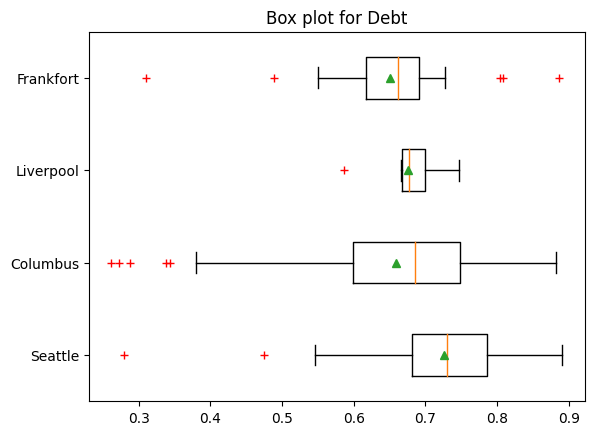

In [72]:
seat= df.loc[df['city']== 'Seattle','debt'].values
colu= df.loc[df['city']== 'Columbus','debt'].values
liver= df.loc[df['city']== 'Liverpool','debt'].values
frank = df.loc[df['city']== 'Frankfort','debt'].values
plt.boxplot([seat,colu,liver,frank],labels=['Seattle','Columbus','Liverpool','Frankfort'],showmeans=True, sym= 'r+',vert=False);
plt.title('Box plot for Debt')
plt.show()

*  From the above box plot we can see the median value of **debt** is much closer to the third quartile than the first quartile, which means the **distribution for Frankfort, is left skewed**.
*  From the above box plot we can see the median value of **debt** is much closer to the first quartile than the third quartile, which means the **distribution for Liverpool is right skewed**. <br>
*  From the above box plot we can see the median value of **debt** is much closer to the third quartile than the first quartile, which means the **distribution for Columbus is left skewed**.
*  From the above box plot we can see the median value of **debt** is much closer to the first quartile than the third quartile, which means the **distribution for Seattle is right skewed**. <br>
*  The dataset contains **outliers in debt data below the lower quartile and above upper quartile** for Frankfort, which means there are people with very less debt and very high debt as compared to the median/mean debt of people living in Frankfort<br>
* The first quartile, median and third qurtile all lie at the same point in Green forest which means the home equity value is same for all people living in Green Forest or there is just one person with home equity.

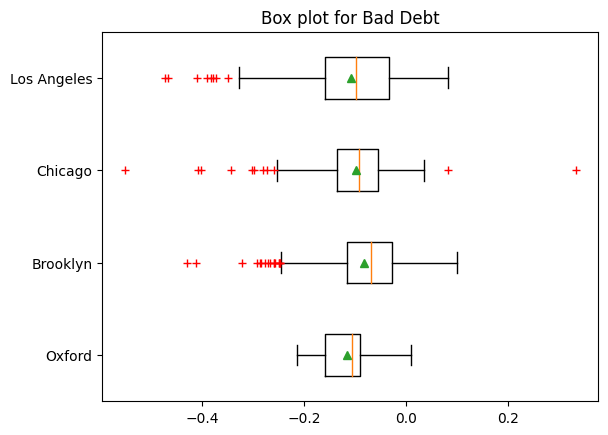

In [73]:
ofx= df.loc[df['city']== 'Oxford','bad_debt'].values
brook= df.loc[df['city']== 'Brooklyn','bad_debt'].values
chig= df.loc[df['city']== 'Chicago','bad_debt'].values
ang= df.loc[df['city']== 'Los Angeles','bad_debt'].values
plt.boxplot([ofx,brook,chig,ang],labels=['Oxford','Brooklyn','Chicago','Los Angeles'],showmeans=True, sym= 'r+',vert=False);
plt.title('Box plot for Bad Debt')
plt.show()

*  From the above box plot we can oserve the median value of **bad debt** is equally close to first and third qurtile, which means the **distribution for Los Angles and Chicago is symmetrical**.
*  From the above box plot we can see the median value of bad debt is much closer to the third quartile than the first quartile, which means the **distribution for Brooklyn and Oxofrd is left skewed**.
*  The **bad debt** data set contains **outliers below lower quartile and above upper quartile** for **Chicago**.
*  The **bad debt** data set contains **outliers below the lower quartile** for **Chicago and Brooklyn**.


In [74]:
## calculating remaning income from family income and household income

remaning_inc= df['family_median'] - df['hi_median']

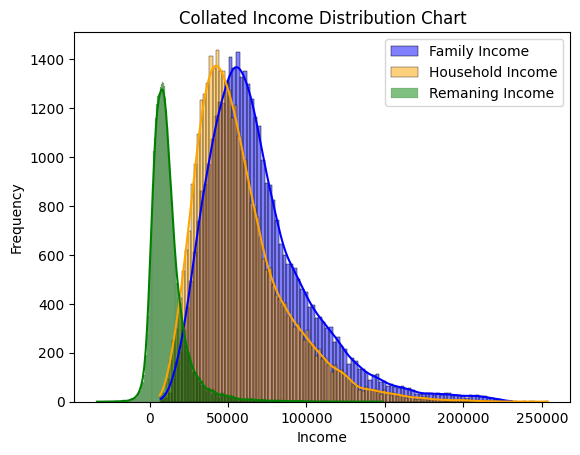

In [75]:
sns.histplot(df['family_median'],kde=True, color='blue', label='Family Income',legend=True)
sns.histplot(df['hi_median'],kde=True, color='orange', label='Household Income',legend=True)
sns.histplot(remaning_inc,kde=True, color='green', label='Remaning Income',legend=True)
## kde parameter is kernel density estimate to smooth the distribution.

plt.title('Collated Income Distribution Chart')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.legend()
plt.show()

* We can observe from above collated distribution chart the overall family income and household income lies between 50,000 to 1,00,000 for the given population
* We can observe that the family income is slightly higer than household income for the given population
* The distribution is similar to normal distribution

In [76]:
# plt.hist(df['family_median'], bins=75, alpha=0.6, label='Family Income')
# plt.hist(df['hi_median'], bins=75, alpha=0.6, label='Household Income')
# plt.hist(remaning_inc, bins=75, alpha=0.6, label='Remaining Income')
# ## The alpha parameter is used for transparency to make overlapping histograms more visible.

# plt.title('Collated Income Distribution')
# plt.xlabel('Income')
# plt.ylabel('Frequency')
# plt.legend()

### Project task 2:
#### Exploratory Data Analysis (EDA):

In [82]:
## calculating density of area

density= df['pop']/df['ALand']

In [83]:
## adding density to original dataset

df['density']= density*100000
df['density']

0        126.029034
1         25.685467
2          1.523347
3          0.499905
4         45.157830
            ...    
27316    264.981421
27317     81.834237
27318      0.213790
27319     61.879771
27320     47.791852
Name: density, Length: 37940, dtype: float64

In [78]:
## calculating overall median age of male and female population

median_age_c= ((df['male_age_median']* df['male_pop']) + (df['female_age_median'] * df['female_pop'])) / (df['male_pop']+df['female_pop'])

In [79]:
df['median_age']= median_age_c

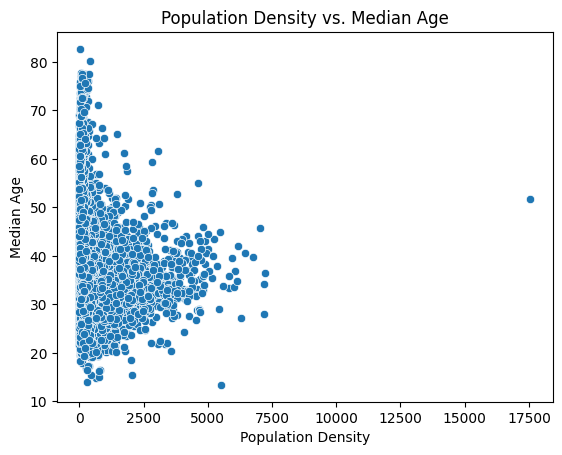

In [84]:
## Scatter plot of Population density vs. Age

sns.scatterplot(x='density', y='median_age', data=df)
plt.title('Population Density vs. Median Age')
plt.xlabel('Population Density')
plt.ylabel('Median Age')
plt.show()

In [85]:
## summary stats into population density and age

print("Summary Stats: \n")
df[['pop', 'ALand', 'density', 'median_age']].describe()

Summary Stats: 



,pop,ALand,density,median_age
count,37940.000000,3.794000e+04,37940.000000,37940.000000
mean,4385.977570,1.251229e+08,200.150973,39.321703
std,2084.057931,1.158857e+09,433.836605,7.397916
min,38.000000,8.299000e+03,0.001172,13.378362
25%,2956.000000,1.824246e+06,12.790635,34.284358
50%,4106.000000,4.951182e+06,86.462514,39.272186
75%,5470.250000,3.453241e+07,206.700889,43.875669
max,53812.000000,1.039510e+11,17556.332088,82.664697


In [86]:
## creaing bins for age

pop_bins= pd.cut(df['pop'],5)
pop_bins

0        (-15.774, 10792.8]
1        (-15.774, 10792.8]
2        (-15.774, 10792.8]
3        (-15.774, 10792.8]
4        (-15.774, 10792.8]
                ...        
27316    (-15.774, 10792.8]
27317    (-15.774, 10792.8]
27318    (-15.774, 10792.8]
27319    (10792.8, 21547.6]
27320    (-15.774, 10792.8]
Name: pop, Length: 37940, dtype: category
Categories (5, interval[float64, right]): [(-15.774, 10792.8] < (10792.8, 21547.6] <
                                           (21547.6, 32302.4] < (32302.4, 43057.2] <
                                           (43057.2, 53812.0]]

In [87]:
male= df['male_age_median'].median()
female= df['female_age_median'].median()
overall= median_age_c.median()
data1= [male,female ,overall]
label= ['male','female','overall']

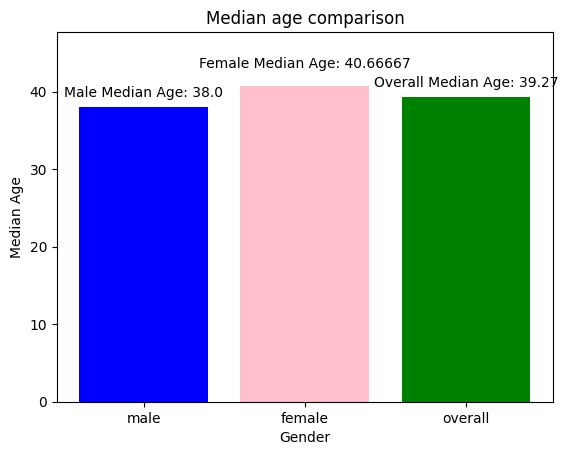

In [150]:
## visulaizing overall, female and male median age for given population

plt.bar(label,data1, color=['blue','pink','green'])
plt.title('Median age comparison')
plt.xlabel('Gender')
plt.ylabel('Median Age')
plt.ylim(0, max(data1) + 7)
plt.text(0, male+1 , f'Male Median Age: {male}', ha='center', va='bottom', color='black')
plt.text(1, female+2, f'Female Median Age: {female}', ha='center', va='bottom', color='black')
plt.text(2, overall+1, f'Overall Median Age: {overall:.2f}', ha='center', va='bottom', color='black')
plt.show()



*   The overall population median age is 39.27 years
*   The male population median age is 38 years
*   The fmale population median age is 38 years






In [89]:
df['state'].unique()

array(['Michigan', 'Maine', 'Pennsylvania', 'Kentucky', 'Texas',
       'Florida', 'Georgia', 'New York', 'California', 'Washington',
       'Illinois', 'Massachusetts', 'Maryland', 'Virginia', 'Nevada',
       'Tennessee', 'District of Columbia', 'Arkansas', 'Alabama',
       'Wisconsin', 'New Mexico', 'Mississippi', 'Ohio', 'Indiana',
       'Montana', 'Oregon', 'New Jersey', 'North Carolina', 'Louisiana',
       'South Carolina', 'Utah', 'Arizona', 'Rhode Island', 'Puerto Rico',
       'Oklahoma', 'Missouri', 'Minnesota', 'Nebraska', 'Colorado',
       'Iowa', 'Connecticut', 'Delaware', 'Kansas', 'West Virginia',
       'Vermont', 'Alaska', 'South Dakota', 'Idaho', 'New Hampshire',
       'Hawaii', 'Wyoming', 'North Dakota'], dtype=object)

In [90]:
overall_inc= df['family_median']
overall_rent= df['rent_median']
overall_rent_percent= (overall_rent / overall_inc *100 ).median()

In [91]:
michigan_inc = df.loc[df['state']=='Michigan','family_median']
michigan_rent = df.loc[df['state']=='Michigan','rent_median']
michigan_rent_percent= (michigan_rent/michigan_inc * 100).median()

In [92]:
texas_inc = df.loc[df['state']=='Texas','family_median']
texas_rent = df.loc[df['state']=='Texas','rent_median']
texas_rent_percent= (texas_rent/texas_inc * 100).median()

In [93]:
nyc_inc = df.loc[df['state']=='New York','family_median']
nyc_rent = df.loc[df['state']=='New York','rent_median']
nyc_rent_percent= (nyc_rent/nyc_inc * 100).median()

In [94]:
indiana_inc = df.loc[df['state']=='Indiana','family_median']
indiana_rent = df.loc[df['state']=='Indiana','rent_median']
indiana_rent_percent= (indiana_rent/indiana_inc * 100).median()

In [95]:
wyoming_inc = df.loc[df['state']=='Wyoming','family_median']
wyoming_rent = df.loc[df['state']=='Wyoming','rent_median']
wyoming_rent_percent= (wyoming_rent/wyoming_inc * 100).median()

In [96]:
data2= [overall_rent_percent, michigan_rent_percent, nyc_rent_percent,indiana_rent_percent,wyoming_rent_percent]
labels= ['Overall','Michigan','NewYork','Indiana','Wyoming']

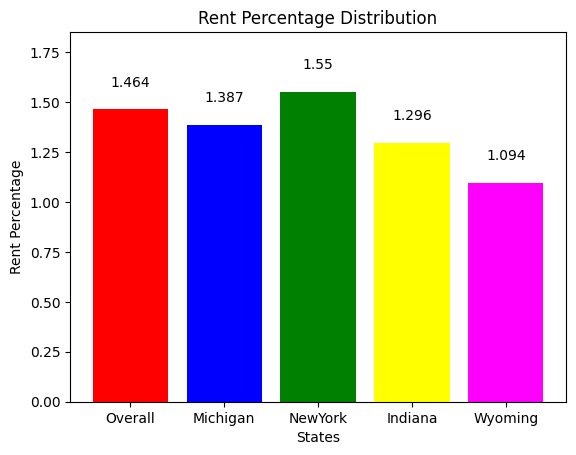

In [97]:
plt.bar(labels, data2,color=['red','blue','green','yellow','magenta'])
plt.title('Rent Percentage Distribution')
plt.xlabel('States')
plt.ylabel('Rent Percentage')
plt.ylim(0, max(data2)+0.3)
plt.text(0, overall_rent_percent+0.1 , overall_rent_percent.round(3), ha='center', va='bottom', color='black')
plt.text(1, michigan_rent_percent+0.1, michigan_rent_percent.round(3), ha='center', va='bottom', color='black')
plt.text(2, nyc_rent_percent+0.1, nyc_rent_percent.round(3), ha='center', va='bottom', color='black')
plt.text(3, indiana_rent_percent+0.1, indiana_rent_percent.round(3), ha='center', va='bottom', color='black')
plt.text(4, wyoming_rent_percent+0.1, wyoming_rent_percent.round(3), ha='center', va='bottom', color='black')
plt.show();

* The rent percentage are calulated diving the rent with family's income for the specific state.
* The overall USA rent percentage according to the family income of total population is 1.464%.
* The overall rent for Michigan state according the the family income of total population in Michigan is 1.387% which is lower than the overall country's rent percentage.
* The overall rent for New York according the the family income of total population in New York is 1.55% which is higher than the overall country's rent percentage.
*  The overall rent for Indiana state according the the family income of total population in Indiana is 1.296% which is lower than the overall country's rent percentage.
*  The overall rent for Wyoming state according the the family income of total population in Michigan is 1.094% which is lower than the overall country's rent percentage.

In [108]:
small_df= pd.DataFrame({
    'pop': df['pop'],
    'age': median_age_c,
    'hs_degree': df['hs_degree'],
    'rent': df['rent_median'],
    'income': df['family_median'],
    'mortgage': df['hc_mortgage_median'],
    # 'second_mortgage' : df['second_mortgage'],
    'owners_cost': df['hc_median'],
    'equity': df['home_equity'],
    'debt': df['debt']

})

<Axes: >

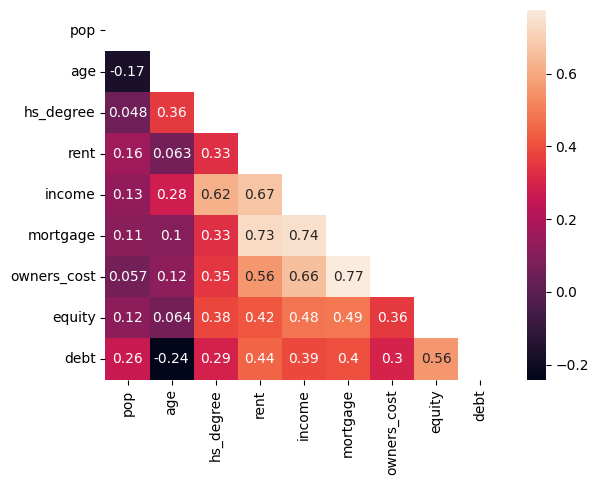

In [109]:
corr= small_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool)) ## genrate a mask for upper triangle
sns.heatmap(small_df.corr(),cbar=True,annot=True,mask= mask)

From the above correlation heatmap we can observe that:
* There is a strong postive correlation between population and owners cost.
* There is negative correlation between individual's age and debt.
* There is strong postive correlation between highscool degree and individual's income.
* There is strong postive correlation between individual's income and rent.
* There is strong postive correlation between induvidual's rent and mortgage.
* There is strong postive correlation between individual's income and mortgage.
* There is strong postive correlation between mortgage and owners cost.
* There is postive correlation between equity and debt.

## Project Task 3:
### Data Pre-processing:

In [ ]:
pip install factor_analyzer

In [111]:
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis

In [112]:
own = 1- df['debt']

In [113]:
lat_var= pd.DataFrame({
    'hs_degree' :df['hs_degree'],
    'median_age': median_age_c,
    'second_mortgage': df['second_mortgage'],
     'percent_own': own,
     'bad_debt': bad_debt})

In [114]:
id_data= ['hs_degree','median_age','second_mortgage','percent_own','bad_debt']

In [115]:
## standardizing the data

std= StandardScaler()
data_std= std.fit_transform(lat_var)

In [125]:
## Factor analysis
# Creating factor analysis object and perform factor analysis

n= len(id_data)
fa= FactorAnalyzer(n, rotation= 'varimax')
fa.fit(data_std)

FactorAnalyzer(n_factors=5, rotation='varimax', rotation_kwargs={})

In [126]:
loadings = pd.DataFrame(fa.loadings_, columns=[f'Factor_{i+1}' for i in range(n)], index=id_data)

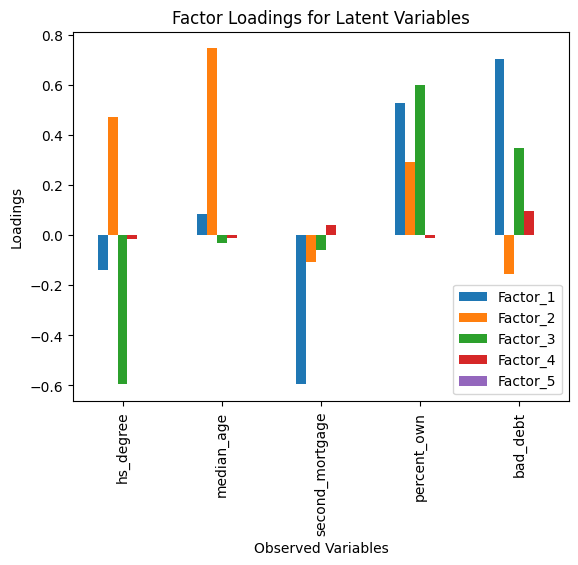

In [148]:
## plotting the loadings of factor analysis

loadings.plot(kind='bar')
plt.title('Factor Loadings for Latent Variables')
plt.xlabel('Observed Variables')
plt.ylabel('Loadings')
plt.show()

In [128]:
# Check Eigenvalues

ev, v = fa.get_eigenvalues()
ev

array([2.07288437, 1.38923744, 0.72091405, 0.45958903, 0.35737511])

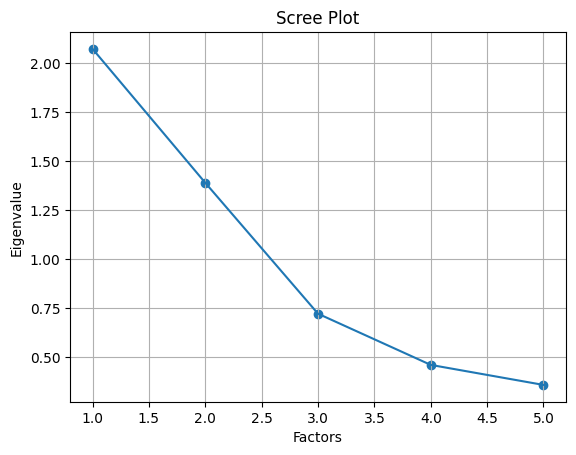

In [130]:
# Create scree plot using matplotlib

plt.scatter(range(1,lat_var.shape[1]+1),ev)
plt.plot(range(1,lat_var.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

## Project Task 4:
### Data modelling:

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_percentage_error, accuracy_score

In [133]:
## Selecting independent and dependent variable

y= df['hc_mortgage_mean']
x= df.drop(['hc_mortgage_mean', 'UID','COUNTYID','STATEID','state','state_ab','place','type','lat','lng','zip_code','area_code','city','place','primary'],axis=1)

In [134]:
## Split the data into training and testing sets

x_train, x_test, y_train, y_test= train_test_split(x,y)

In [136]:
## initialize Linear Regression Model

model= LinearRegression()

# Train the model on the training set
model.fit(x_train, y_train)

LinearRegression()

In [140]:
## making predictions on test set

y_pred= model.predict(x_test)

In [141]:
## Evaluate the model

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R-squared: {r2:.2f}')
print(f'Mean Squared Error: {mse:.2f}')

R-squared: 0.99
Mean Squared Error: 4493.00


In [142]:
## Model Prediction at State level

def state_model(state):

## print("Model Prediction at State level \n\n")

  state_df = df[df['state']== state]
  x_state= state_df.drop(['hc_mortgage_mean', 'UID','COUNTYID','STATEID','state','state_ab','place','type','lat','lng','zip_code','area_code','city','place','primary'],axis=1)
  y_state= state_df['hc_mortgage_mean']

  X_train, X_test, Y_train ,Y_test= train_test_split(x_state, y_state)

  model= LinearRegression()
  model.fit(X_train, Y_train)
  Y_pred= model.predict(X_test)

  r2 = r2_score(Y_test, Y_pred)
  mse = mean_squared_error(Y_test, Y_pred)
  #acc= accuracy_score(Y_test, Y_pred)
  mpe= mean_absolute_percentage_error(Y_test, Y_pred)

  print(f'R-squared for {state}: {r2:.3f}')
  print(f'Mean Squared error for {state}: {mse:.3f}')
  #print(f'Accuracy score for {state}: {acc:.2f}')
  print(f'Mean Absolute percentage error for {state}: {mpe:.4f}')
  print('\n')

In [143]:
print("Model Prediction at State level \n\n")

for state in df['state'].unique() :
  state_model(state)

Model Prediction at State level 


R-squared for Michigan: 0.985
Mean Squared error for Michigan: 1897.614
Mean Absolute percentage error for Michigan: 0.0248


R-squared for Maine: 0.890
Mean Squared error for Maine: 11185.662
Mean Absolute percentage error for Maine: 0.0617


R-squared for Pennsylvania: 0.990
Mean Squared error for Pennsylvania: 2175.769
Mean Absolute percentage error for Pennsylvania: 0.0241


R-squared for Kentucky: 0.987
Mean Squared error for Kentucky: 1557.072
Mean Absolute percentage error for Kentucky: 0.0266


R-squared for Texas: 0.987
Mean Squared error for Texas: 4036.328
Mean Absolute percentage error for Texas: 0.0290


R-squared for Florida: 0.984
Mean Squared error for Florida: 4664.281
Mean Absolute percentage error for Florida: 0.0296


R-squared for Georgia: 0.984
Mean Squared error for Georgia: 3299.331
Mean Absolute percentage error for Georgia: 0.0305


R-squared for New York: 0.973
Mean Squared error for New York: 15890.515
Mean Absolute percent

In [ ]:
df.to_csv('df.csv')

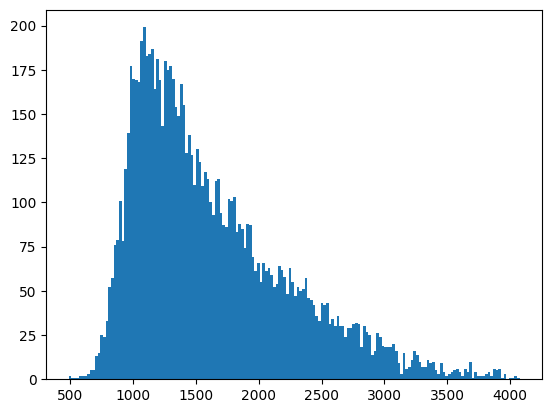

In [146]:
plt.hist(y_pred,bins=170)
plt.show()